## Assignment 07
### Note:
- For visualization, you have the freedom to choose one or many from
    - Matplotlib
    - Seaborn
    - Plotly Express 
    - any other library
- You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.
- Use use this notebook as your template and follow the instructions

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The links to the zip file is (you have already used it in your assignment 5):

- https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources (The page containing link to the zip file)

- https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip (The link to download the zip file)

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [1]:
# <1> 
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
#(Write code here)


In [4]:

# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)
x = os.getcwd()
print(x)# Current working directory
path = os.chdir('C:\\Users\\Public\\X\\CollegeScorecard_Raw_Data_01192021\\Raw data files')

C:\Users\Public\X\CollegeScorecard_Raw_Data_01192021\Raw data files


In [5]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

#(Write code here)        
files = [i for i in os.listdir(path) if 'MERGED' in i]
files

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [6]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

#(Write code here)
col_list = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]
dfs = []
for i in files:
    df = pd.read_csv(i, usecols=col_list)
    df['YEAR'] = i[6:10]
    dfs.append(df)
data_conct = pd.concat(dfs, axis=0, ignore_index=True)

In [7]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
data_conct.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [8]:
data_conct.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
99084,208406,Clackamas Community College,OR,8.0,NaN,3555.0,2010
127290,124681,United Education Institute-Huntington Park Campus,CA,8.0,NaN,NaN,2014
33451,423412,Mid Cities Barber College,TX,6.0,NaN,NaN,2000
69944,179070,Everest College-Springfield,MO,4.0,0.9462,9051.0,2006
149385,45897304,Strayer University-Plano,TX,6.0,NaN,12975.0,2016
69408,163453,Morgan State University,MD,2.0,0.1890,6204.0,2006
161320,444404,The Beauty Institute,FL,5.0,NaN,NaN,2018
21537,133845,Concorde Career Institute-Jacksonville,FL,5.0,NaN,NaN,1999
57909,219639,Baptist Memorial College of Health Sciences,TN,5.0,0.3880,5000.0,2004
50912,211325,Triangle Tech Carpentry Inc,PA,2.0,1.0000,8868.0,2003


In [9]:
data_conct.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
163326,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
163327,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
163328,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
163329,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
163330,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [10]:
data_conct.shape

(163331, 7)

In [11]:
data_conct.isna().any()

UNITID           False
INSTNM           False
STABBR           False
REGION            True
ADM_RATE          True
TUITIONFEE_IN     True
YEAR             False
dtype: bool

In [12]:
data_conct.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44912.000000,79195.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871
std,4.571721e+06,2.189217,0.217058,9986.003542
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [13]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
umbc_df = data_conct.loc[data_conct['INSTNM'] == 'University of Maryland-Baltimore County'].reset_index(drop=True)

In [14]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
umbc_df.shape

(23, 7)

In [15]:
umbc_df.columns# variables

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [16]:
umbc_df.head()# front data

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
1,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
3,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
4,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [17]:
umbc_df.tail() #Last data

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
18,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
19,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
20,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
21,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
22,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [18]:
umbc_df.sample(10) # Sample of 10

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
11,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
20,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
13,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
5,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
19,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
14,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010
18,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
17,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
8,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004


In [19]:
umbc_df.isna().any()#Looking for null values

UNITID           False
INSTNM           False
STABBR           False
REGION           False
ADM_RATE          True
TUITIONFEE_IN     True
YEAR             False
dtype: bool

In [20]:
umbc_df.describe()#Some stats

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


Text(0.5, 1.0, 'Bar plot of UMBC instate tuition fee against each year')

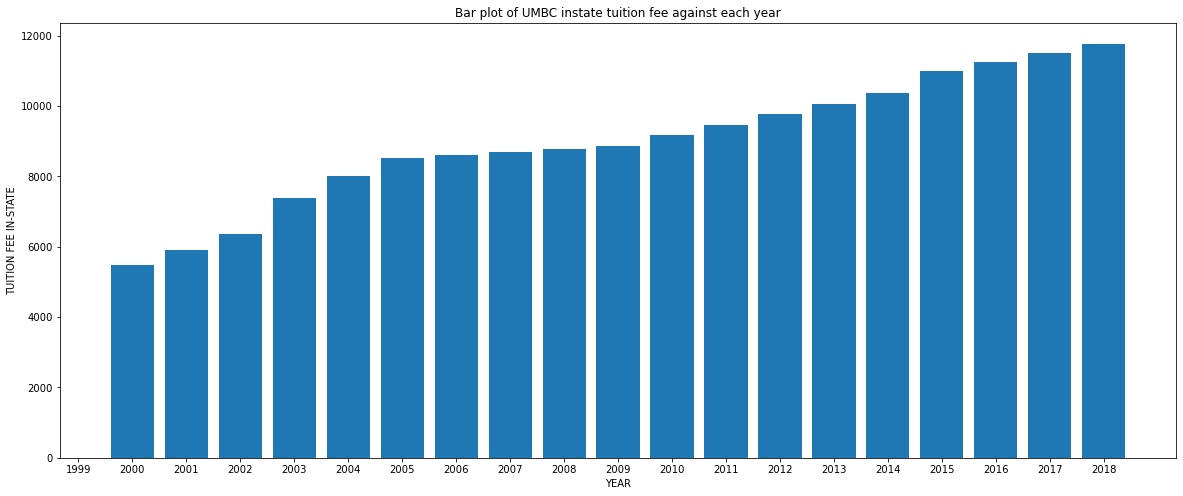

In [21]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

#(Write code here)
plt.figure(figsize=(20,8))
plt.bar(x='YEAR', height='TUITIONFEE_IN', data=umbc_df)
plt.xlabel('YEAR')
plt.ylabel('TUITION FEE IN-STATE')
plt.title('Bar plot of UMBC instate tuition fee against each year')

Text(0.5, 1.0, 'Line plot of UMBC instate tuition fee against each year')

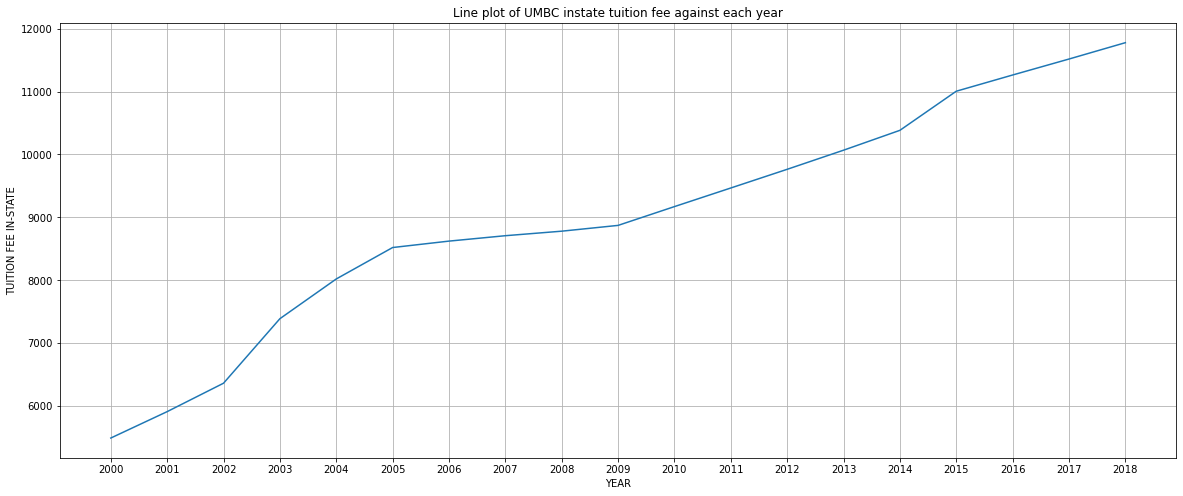

In [22]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)
plt.figure(figsize=(20,8))
plt.grid()
plt.plot('YEAR', 'TUITIONFEE_IN', data=umbc_df)
plt.xlabel('YEAR')
plt.ylabel('TUITION FEE IN-STATE')
plt.title('Line plot of UMBC instate tuition fee against each year')

In [23]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)
lst_tuti = umbc_df['TUITIONFEE_IN'].to_list() # List with only the UMBC tuition fee over the years 1996-2019
lst_tuti

[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [24]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)
temp_Series = pd.Series(lst_tuti) # Creating a series
changes = temp_Series.pct_change()*100 #pct_change() returns percentage change from before and after values
changes = changes.to_list() #Converts from series to list
changes #The percentage changes list

[nan,
 nan,
 nan,
 nan,
 nan,
 7.650273224043724,
 7.648054145516081,
 16.127004086765172,
 8.554412560909586,
 6.234413965087282,
 1.1971830985915588,
 0.9974483878450568,
 0.8268259072117701,
 1.0478359908883794,
 3.370153291253386,
 3.227565151019518,
 3.137213478398637,
 3.113478082752974,
 3.138657131505762,
 5.989984591679498,
 2.344175904052337,
 2.254971590909083,
 2.257336343115135]

In [25]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)
my_formatted_list = [round(i, 2) for i in changes ] # Rounding off to 2 decimals
my_formatted_list 

[nan,
 nan,
 nan,
 nan,
 nan,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

In [26]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)
umbc_df['PCT_CHANGE'] = my_formatted_list # Inserting values to column PCT_CHANGE
umbc_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
0,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
1,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
3,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
4,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
5,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
6,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
7,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
8,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
9,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


Text(0, 0.5, 'Percentage Change')

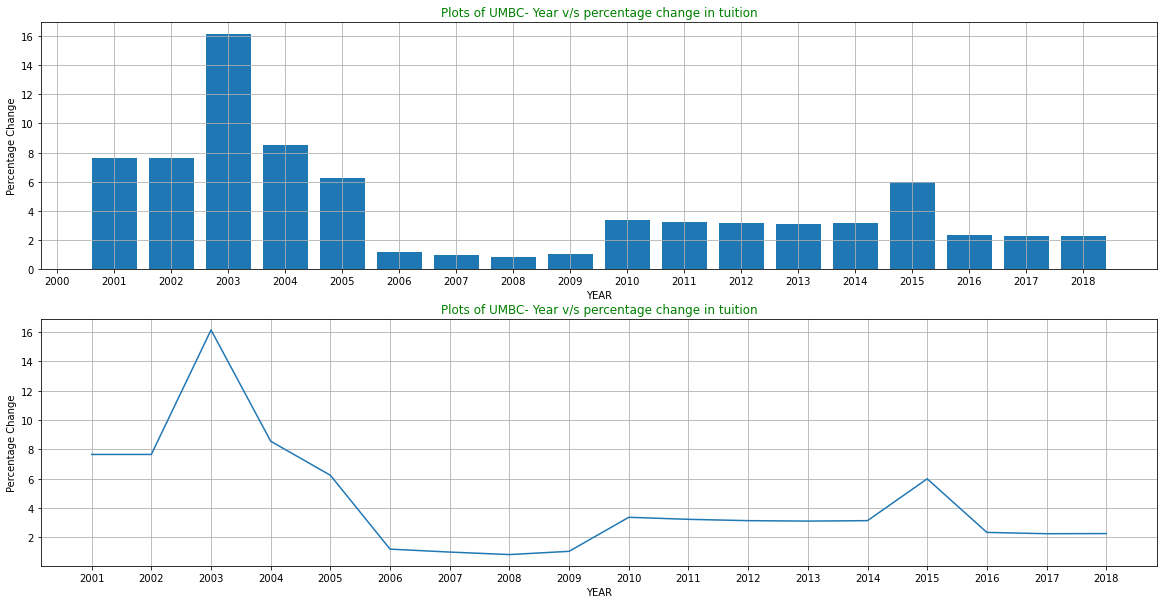

In [27]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)

# Bar and line plots of percentage changes
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.grid()
plt.title('Plots of UMBC- Year v/s percentage change in tuition', color='green')
plt.bar(x='YEAR', height='PCT_CHANGE', data=umbc_df)
plt.xlabel('YEAR')
plt.ylabel('Percentage Change')
plt.subplot(2,1,2)
plt.grid()
plt.title('Plots of UMBC- Year v/s percentage change in tuition', color='green')
plt.plot('YEAR', 'PCT_CHANGE', data=umbc_df)
plt.xlabel('YEAR')
plt.ylabel('Percentage Change')

In [28]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)
def calculate_percent_change(any_list):
    """
    This function takes list as argument and
    returns llist with percentage changes
    """
    temp = pd.Series(any_list)
    new = temp_Series.pct_change()*100
    new = new.to_list()
    return new

In [29]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)

# Steps of UMBC are executed similarly to the JHU data
jhu_df = data_conct.loc[data_conct['INSTNM'] == 'Johns Hopkins University'].reset_index(drop=True)
jhu_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
1,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
2,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
3,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
4,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
5,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
6,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
7,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
8,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
9,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


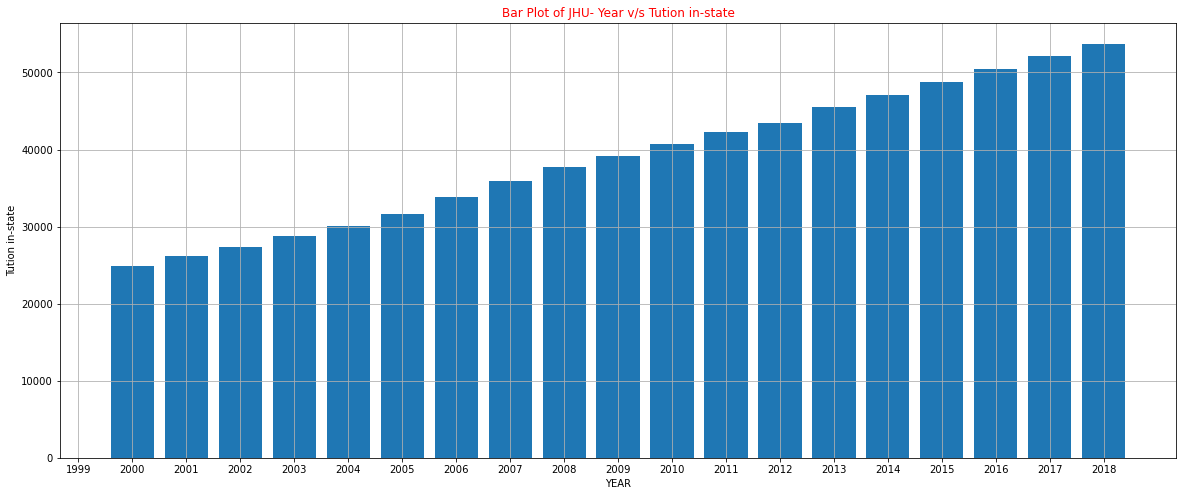

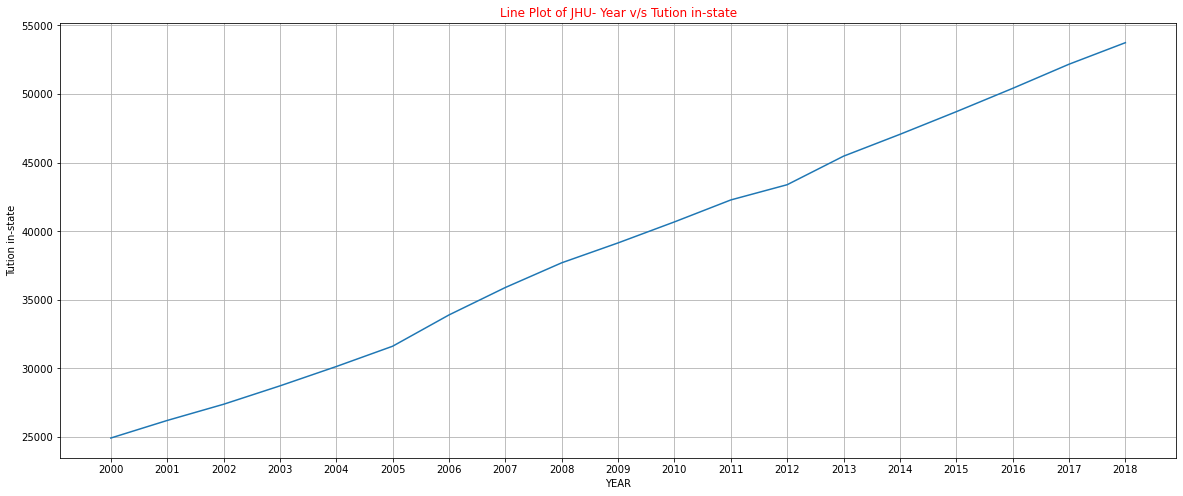

In [30]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)
plt.figure(figsize=(20,8))
plt.bar(x='YEAR', height='TUITIONFEE_IN', data=jhu_df)
plt.grid()
plt.title('Bar Plot of JHU- Year v/s Tution in-state', color='red')
plt.xlabel('YEAR')
plt.ylabel('Tution in-state')
plt.figure(figsize=(20,8))
plt.grid()
plt.title('Line Plot of JHU- Year v/s Tution in-state', color='red')
plt.xlabel('YEAR')
plt.ylabel('Tution in-state')
plt.plot('YEAR', 'TUITIONFEE_IN', data=jhu_df)

In [31]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)
jhu_list = jhu_df['TUITIONFEE_IN'].to_list()
# Using the function created above to get the percentage changes of JHU data
jhu_percent_change_list = calculate_percent_change(jhu_list)
jhu_formatted_list = [round(i, 2) for i in jhu_percent_change_list ]
jhu_formatted_list # List with percentage changes of jhu tuition fees over years

[nan,
 nan,
 nan,
 nan,
 nan,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

In [32]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)

jhu_df['PCT_CHANGE'] = jhu_formatted_list
jhu_df # added the above list to jhu dataframe

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
0,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
1,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
2,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
3,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
4,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
5,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,7.65
6,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,7.65
7,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,16.13
8,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,8.55
9,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,6.23


Text(0, 0.5, 'Percentage Change')

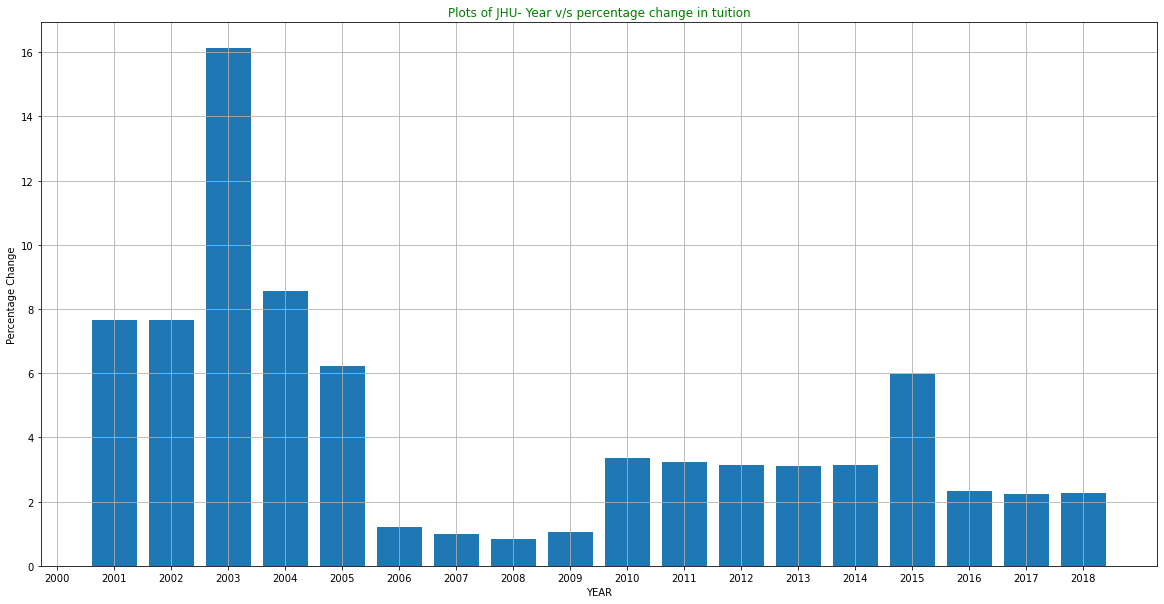

In [33]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)
plt.figure(figsize=(20,10))
plt.grid()
plt.title('Plots of JHU- Year v/s percentage change in tuition', color='green')
plt.bar(x='YEAR', height='PCT_CHANGE', data=jhu_df)
plt.xlabel('YEAR')
plt.ylabel('Percentage Change')

In [34]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)

# Creating the new dataframe umbc2 with only year and pct_change columns
umbc2 = umbc_df[['YEAR', 'PCT_CHANGE']]
umbc2 = umbc2.rename(columns = {"PCT_CHANGE":"UMBC_PCT"}).reset_index(drop=True)# Renaming column
umbc2

,YEAR,UMBC_PCT
0,1996,NaN
1,1997,NaN
2,1998,NaN
3,1999,NaN
4,2000,NaN
5,2001,7.65
6,2002,7.65
7,2003,16.13
8,2004,8.55
9,2005,6.23


In [35]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)

# Creating new dataframe jhu2 with only year and pct_chnage
jhu2 = jhu_df[['YEAR', 'PCT_CHANGE']]
jhu2 = jhu2.rename(columns = {"PCT_CHANGE":"JHU_PCT"}).reset_index(drop=True) # Renaming column
jhu2

,YEAR,JHU_PCT
0,1996,NaN
1,1997,NaN
2,1998,NaN
3,1999,NaN
4,2000,NaN
5,2001,7.65
6,2002,7.65
7,2003,16.13
8,2004,8.55
9,2005,6.23


In [36]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)

merged_df = pd.merge(umbc2,jhu2) # Merging two dataframe to one
merged_df

,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,7.65,7.65
6,2002,7.65,7.65
7,2003,16.13,16.13
8,2004,8.55,8.55
9,2005,6.23,6.23


<AxesSubplot:title={'center':'Bar plot of instate tuition fee of UMBC and JHU percentage change for each year '}, xlabel='YEAR', ylabel='Percentage change'>

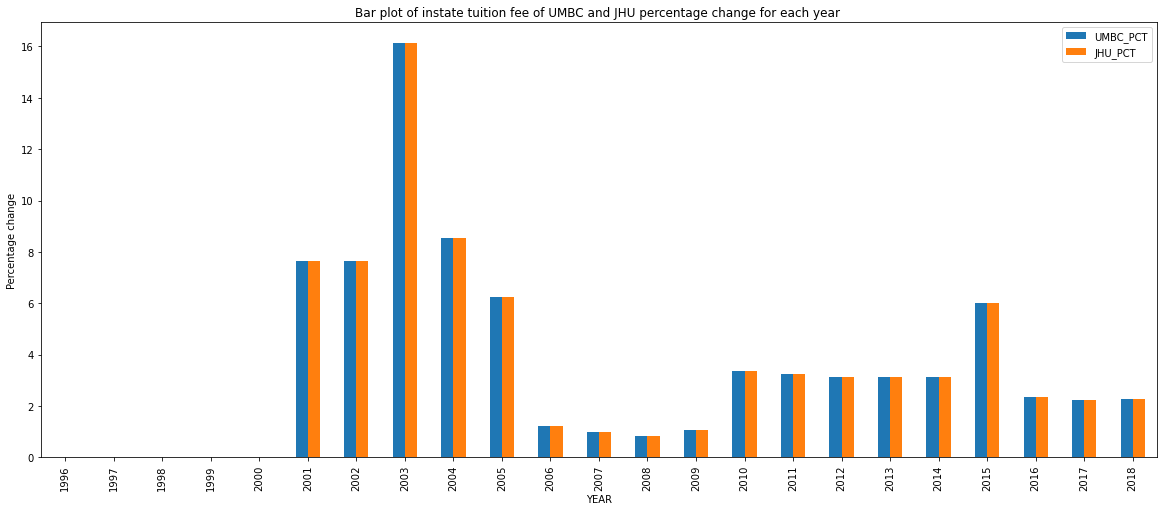

In [37]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)

# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)


merged_df.plot(x='YEAR', y=['UMBC_PCT', 'JHU_PCT'], kind='bar', figsize=(20,8),
               ylabel='Percentage change',
               title='Bar plot of instate tuition fee of UMBC and JHU percentage change for each year ')

<AxesSubplot:title={'center':'Line plot of instate tuition fee of UMBC and JHU percentage change for each year '}, xlabel='YEAR', ylabel='Percentage change'>

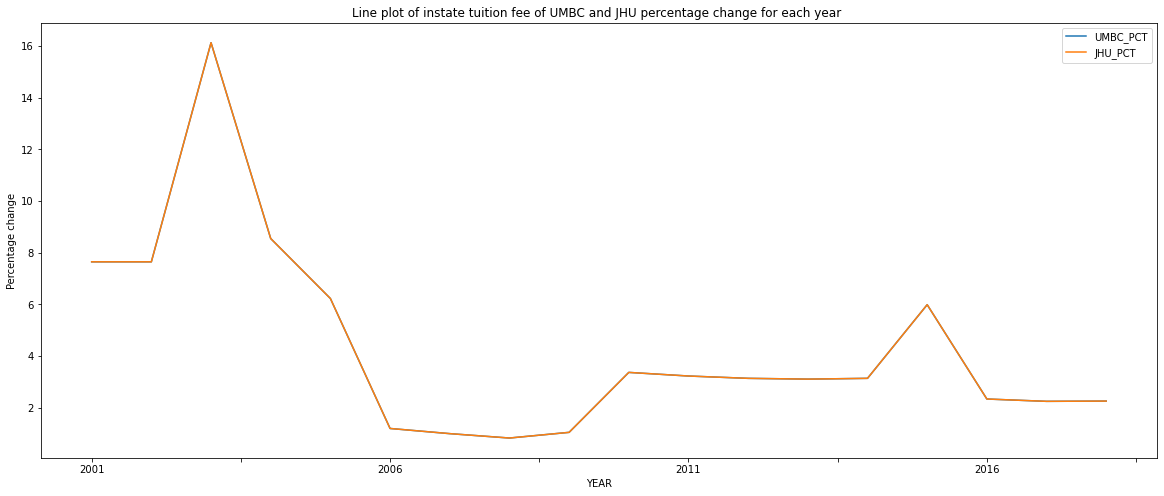

In [38]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)

merged_df.plot(x='YEAR', y=['UMBC_PCT', 'JHU_PCT'], figsize=(20,8),
               ylabel='Percentage change',
               title='Line plot of instate tuition fee of UMBC and JHU percentage change for each year ')

In [39]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
> Bar plot: From the bar plot above, we can see that for both the universities "UMBC" and "JHU", the percentage change in In-state tuition fee over the years 2001-2018 is same (The data for the years 1996-2000 is not available "NA"). The colors for both universities are differentiated.

> For the Line plot, we cannot see the colors since both the lines are overlapped because of same percentage change(Line an be seen in color brown).

In [40]:
# The end.